# Computer Vision Industry Recommendation 

### Overview

Computer Vision is interested in entering the film industry for the first time. Movie data was analyzed from multiple databases in order to understand the most profitable and successful movies. This data was analyzed utilizing various statistical methods and data manipulation.

### Business Understanding

Computer Vision is looking to produce original video content with the creation of a new movie studio. Their goal is to strategically release top-rated, and high grossing films, but lack of industry specific knowledge and experience is delaying this expansion. An uncalculated debut into the film industry may lead to poor brand recognition or unnecessary financial loss.

By leveraging box office data sources to draw conclusions on variables like release month, genre, audience ratings, and profits our team seeks to answer the how, what, and when so Computer Vision can successfully begin creating films tailored to surpass their goals 

### Data Understanding and Analysis

**Data Sources**:
- Box Office Mojo
- IMDB
- Rotten Tomatoes

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  - Movie Information 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  - Movie Reviews

- The Movie DB
- The Numbers

### Description of Data

#### Box Office Mojo 

From Box Office Mojo, 3387 records of films during the years 2010-2018, studio name, and their corresponding domestic and foreign gross box-office revenue are given.The Box Office Mojo data type accuratley described the string data as object. However, foreign gross total was listed as "object" and domestic gross was listed as a float even though no decimal value was indicated. Cleaning the dataset included changing the data type of foreign and domestic gross to integer. There were less than 40 NaNs between the studio, and domestic gross columns so dropping these rows was applicable. 

Alternatively, with over 1,300 NaN values under foreign gross column, the missing data was too significant to draw conclusions and limited analysis. The team concurred that replacing such NaNs with the related mean or another significant value would disproportionaly skew the data. 

Without knowing expenses incurred during production, both domestic and foreign gross revenues cannot be interpreted to the necessary extent. Although, neither release year nor movie title were relevant, an option to compare title to foreign or domestic gross could provide slight insight into title success.

Although the Box Office Mojo provides intriguing data, analyzing the irrelevant and missing data values limits its ability to provide actionable next steps for Computer Vision. Therefore, the team did not use the Box Office Mojo dataset for analyses.

#### IMDB

Internet Movie Database is an SQL database that served as the foundation of the team's statistical analyses. Containing 8 separate tables of data on key contributors like principals, persons, directors, writers along with film specific data like movie basics, ratings, and location. The team only used data within the movie basics, and movie ratings tables. Further specification of these tables are as follows:

The **movie basics** table included a total of 146,144 entries and 6 columns labeled: movie id, primary title, original title, start year, runtime in minutes, and genres. The data type for each column was accurately assigned. It is assumed that the distinction between primary title and original title is for language translation. There are 21 NaN values for original title, but this is not concerning because there are no NaNs under primary title so every film is accounted for. The start year column ranged from 2010 to 2115. In order to run analysis, the team filtered the start year to only include current and past years, that being 2010-2023.The max run time was 51,420 proving there are outliers within the data. To mitigate inaccuracy, the team filtered runtime to only include lengths less than or equal to 500 minutes. Genres are given as a list of strings. Each movie has at least one genre, while others have a variety. There were 5,408 missing genre values, which comprised 3.7% of the data for this row. The team concluded that this percentage is low enough to drop the NaN values within genre using the "is not null" description within an SQL query.

The **movie ratings** table stored 73,856 entries under 3 columns labeled: movie id, average rating, and number of votes. The data type for each column was accurately assigned: average number of ratings as a float, and number of votes as an integer. At least 75% of movies had at least 14 ratings. In order to remove outliers while maintaining the integrity of the data, the lower quartile was chosen as the minimum number of ratings necessary to be included in analysis.

To perform analysis on the **IMDB database** the team used an inner join to combine the movie basics and movie ratings table via an SQL query called cleaning query. This query incorporated the release year, and rating parameters mentioned above. After filtering for more than 14 ratings, there was only ~600 (<2%) of empty values for the average rating and genres features, therefore we decided to drop them since very little data are lost. Once the SQL tables were joined and cleaned, the team transformed the genre column into strings using .astype(str), .str.split(',"), and (pd.Series.explode) to split them. This will help us look at genres individually and recommend movie genres Computer Vision should focus on. Average rating and genre were sorted in descending order, and from this the top five genres were selected and transformed into horizontal bar charts.

The initial limitations of the IMDB were the aggregated lists of film genres, NaN values, and outliers. By setting a minimum value for number of votes (ratings), dropping missing values and duplicate rows, the dataset became more reliable and easy to analyze. Although the IMDB provided 8 tables, movie basics and movie ratings were best suited to provide actionable recommendations for Computer Visions. Entering a new industry is intimidating and complex. Understanding initial steps such as highest rated genres can add direction to Computer Visions' new studio and increase their probability of early success.

#### Rotten Tomatoes

Rotten Tomatoes was the source for both the movie_info and reviews dataset.

**Rotten Tomatoes' movie information** dataset contained a total of 1,560 entries. The 12 column headers provided data for each films': synopsis, rating, genre, director, writer, release date, dvd date, box office revenue, run time, and studio. Every column had NaN values, excluding id. The most significant NaN columns were currency, box office, and studio, each with less than 350 records. This means we are missing 78% of the data for each of these columns. Film ratings ranged from NC17 to G and .dropna was used to remove NaN values since only 3 occurred. The currency value was either USD ($) or NaN. Without data on the release location of each film, the team was unable to substitute the missing currencies. Similarly, with such a deficit of data points for box office revenue amounts, filling in mean or similar profit values would disrupt the accuracy of the dataset significantly. Whether box office revenue is foreign, domestic or a combination of both is also unknown. Genre was analyzed within a separate dataset, and therefore remained untouched. Theater date and dvd date were converted using Python's datetime module.

Given the large number of limitations of the dataset, and missing film titles the team did not analyze this data to provide recommendations. Although with further comparison of other tables, examining genre, synopsis, and revenue could provide Computer Vision with data on successful storylines, and characters.


**Rotten Tomatoes' movie reviews** dataset contained 54,432 entries with 8 columns listed as: id, review, rating, fresh, critic, top critic, publisher and date. The majority of the dataset contained details on the sentiment data of film reviews. The types of rating per review varied greatly. There were some on a 0-5 scale, some 0-10, and others used a grade scale, for example: B-, C, F. Some ratings included floating numbers as well, such as 2.5/5. In addition, the ratings column had the most NaN values, 13,517. The missing and inconsistent rating data was one of the largest limitations within this dataset along with lack of film titles associated with each rating. The team did utilize .strip to remove unnecessary white spaces and punctuation from each review. Following Python's boolean type expressions, it is assumed that a top critic value of 0 indicates False, and a value of 1 indicates True. Although, this does not provide deeper insight of the review or add value to Computer Vision's current business problem. As before, review data was adapted using Python's datetime module.

With much of the data being subjective based, and limited background on the fresh and rating methodology, the team did not use this dataset as a basis for recommendations. Descriptive statistics are not listed, as a majority of the data is qualitative versus quantitative. In the future, more complex sentiment analysis of critic reviews and an established rating scale may be used to compare film success or profitability.

#### The Movie DB

The movie database contained a total of 26,517 entries with 9 columns. The columns provided were: genre id, id, original language, original title, popularity, release date, title, vote average, and vote count. The dataset was complete, with no NaN values. The genre ids were given by number, for example: [12,14,10751] which is assumed to relate a specific genre. However, the key for genre id was not listed to a corresponding genre type. As usual, release date was converted to Python's datetime format to more easily filter through data values. Original title versus title is due to language translation such as es, or ja. The popularity values ranged from a minimum of .6 and a maximum of 80.77 however, the mean was 3.13. This indicates outliers within the popularity column. 

The team was limited in their interpretation of popularity data because there was no associated scale showing how this value was computed. This value was not used in the final recommendation analysis. The film titles were included which provides greater opportunity for analysis when joining with other databases. The data types for both vote average and vote count were accurately labeled as float and int. The voting scale ranges from 0 to 10 based on a .describe return showing a min of 0.00 and max of 10.00. Vote count was also disproportionally skewed with outliers, as the mean was 194 and the max returned 22,186 votes. The team did not use this dataset as a basis for recommendations.

#### The Numbers DB

The movie budgets database provided 5,782 entries with 5 column types, these were: release date, movie, production budget, domestic gross, and worldwide gross. The team was initially limited by the formatting and organization of the numbers database and although there were 0 NaN values, 254 rows within worldwide gross had a placeholder value of "0". Since this was only 10% of the data, the team decided to drop these rows. Release date was formatted using Python's datetime module for more seamless filtering of the month value. 

Years were filtered to exclude those before 2000, which was only 4 rows. The movie column was accurately placed into a string data type, however production budget, domestic gross, and worldwide gross were as well. These were all cleaned and converted into integers, because no decimal places were included. In addition, a lambda function with .strip and .replace was used to rid special characters like '$' and commas where applicable. No duplicate rows were identified after running the database through another lambda function. Film titles provided accessibility to work with and join other databases.

The profitability multiplier was a key component of the team's recommendation, which was calculated using worldwide gross divided by production budget and returned in a column of its own labeled "Profitability". This was used to measure against months extracted from release date. By then merging the previously created cleaned_sqldata table from IMDB to create a common DataFrame the effect of genres on profitability was analyzed. The numbers dataset provides a realistic and financial based recommendation and several avenues for Computer Vision to pursue.

### Visualizations

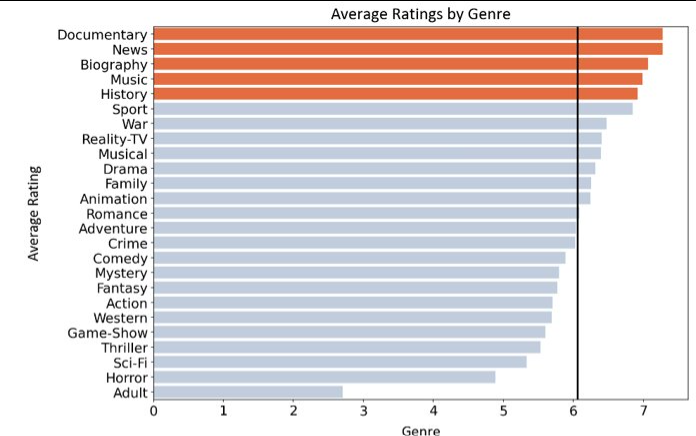

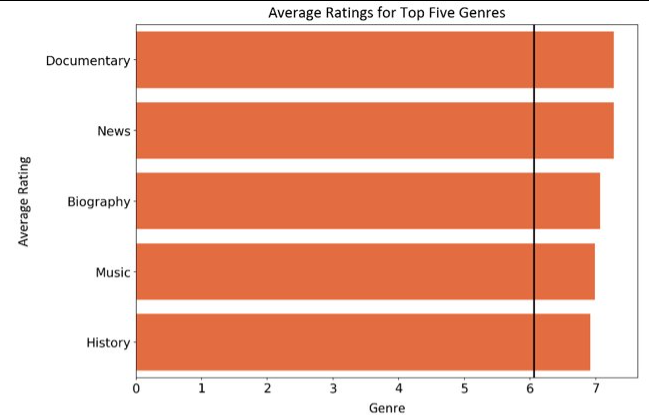

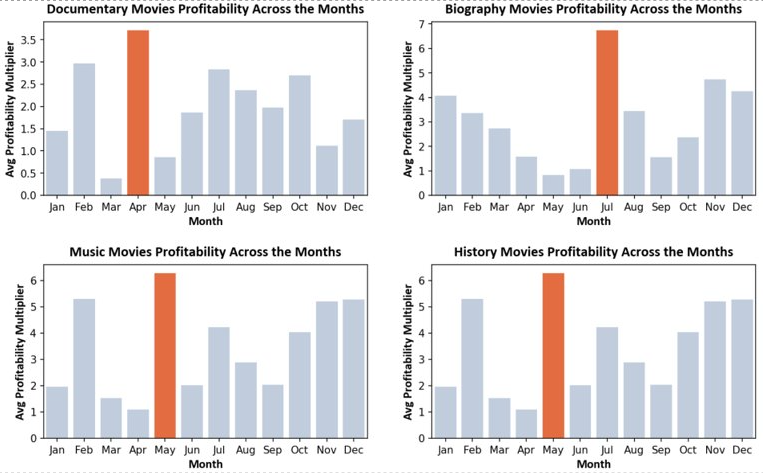

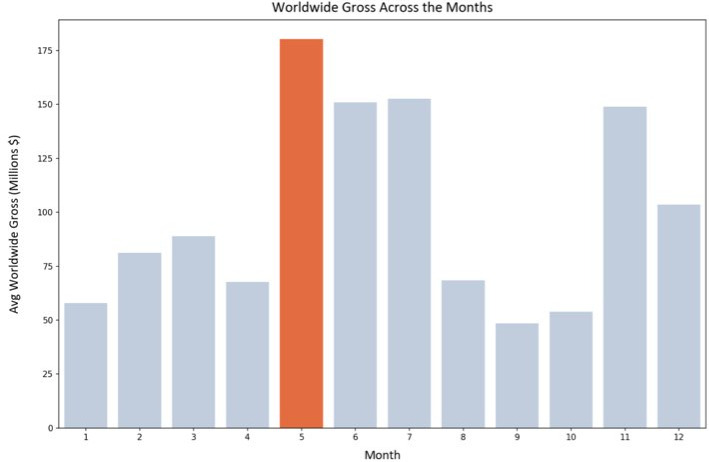

### Statistical Communication 

Our top five genres included documentarys, news, biography, music, and history. Therefore we initially recommended that Computer Vision stay within these top five genres when creating movies now and in the near future. However, we wanted to narrow down a recommendation for the first movie Computer Vision creates based on ratings and profitability.

First, we combined our SQL data containing movie ratings, movie genre, and movie titles with our data from 'The Numbers' that contained movie title, movie budget, and movie profitability. Since the data regarding movies within the news genre has little information on budgets (only 2 movies have profit information) we excluded this as we do not have enough data.

Secondly, we created a confidence interval for the remaining top four genres in average rating and profitbality. This yeild the above results.

It is evident from the above results that a documentary movie will have a high probability of containing a rating of 7.06 to 7.22. Which is higher than that of the other top five genres. Additionally the confidence interval (95%) shows a profitability multiplier ranging from 5.14 to 5.26. This profitability multiplier is comparable to that of biography; however, due to documentaries higher ratings and closeness of profitability, Computer Vision's first movie should be a documenatary in order to establish customer rapport while choosing a highly profitable genre.

### Conclusion

Our recommendations invovle the first movie to create, genres to focus on in the near future and the best months to release a movie within our top genres. We believe Computer Vision will find great initial success if they were to create a documentary as their first movie. Documentaries have shown large profitable success compared to other genres in the past. Additionally, documentaries yeild high average ratings. By creating a documentary as their first movie, Computer Vision would be able to harness both benefits.

Our other recommendations invovle the time to publish and the movies to focus on in the near future. Computer Vision should consider profits; however, creating highly rated movies creates rapport and brings customers back. Therefore we believe they should stick to making movies within the top five genres. Additionally, Computer Vision should release these movies when they have been found to be most successful. For example, releasing a documenary within the month of April will likely yeild high returns.

Overall, we strongly believe these recommendations will create success for Computer Vision. In the future, more recent and relevant data should be found to yeild more accurate results. Additionally the Rotten Tomatos data should be broken down in order to create more statistical conclusions.

 